In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import ttest_rel
from scipy.stats import t
import os
import sys

sys.path.insert(0, "/Users/tonymeissner/source/CancelCultureImpact/src/")
sys.path.insert(0, "/Users/tonymeissner/source/CancelCultureImpact/src/analysis/")
from config import *
from analyzer_functions import *

In [2]:
kanye_follower_change = pd.read_csv(os.path.join(RAW_DATA_PATH, 'kanye_west_spotify_daily_followers.csv'))
kanye_gt = pd.read_csv(os.path.join(RAW_DATA_PATH, 'kanye_west_google_trends.csv'))
kanye_listen_change = pd.read_csv(os.path.join(RAW_DATA_PATH,  'kanye_west_spotify_daily_listeners.csv'))
kanye_stats = pd.read_csv(os.path.join(RAW_DATA_PATH, 'kanye_west_youtube_stats.csv'))

In [4]:
manson_follower_change = pd.read_csv(os.path.join(RAW_DATA_PATH, 'marilyn_manson_spotify_daily_followers.csv'))
manson_gt = pd.read_csv(os.path.join(RAW_DATA_PATH, 'marilyn_manson_google_trends.csv'))
manson_listen_change = pd.read_csv(os.path.join(RAW_DATA_PATH, 'marilyn_manson_spotify_daily_listeners.csv'))
manson_stats = pd.read_csv(os.path.join(RAW_DATA_PATH, 'marilyn_manson_youtube_stats.csv'))

In [5]:
kelly_follower_change = pd.read_csv(os.path.join(RAW_DATA_PATH, 'r_kelly_spotify_daily_followers.csv'))
kelly_gt = pd.read_csv(os.path.join(RAW_DATA_PATH, 'r_kelly_google_trends.csv'))
kelly_listen_change = pd.read_csv(os.path.join(RAW_DATA_PATH, 'r_kelly_spotify_daily_listeners.csv'))
kelly_stats = pd.read_csv(os.path.join(RAW_DATA_PATH, 'r_kelly_youtube_stats.csv'))

In [6]:
seungri_follower_change = pd.read_csv(os.path.join(RAW_DATA_PATH, 'seungri_spotify_daily_followers.csv'))
seungri_gt = pd.read_csv(os.path.join(RAW_DATA_PATH, 'seungri_google_trends.csv'))
seungri_listen_change = pd.read_csv(os.path.join(RAW_DATA_PATH, 'seungri_spotify_daily_listeners.csv'))
seungri_stats = pd.read_csv(os.path.join(RAW_DATA_PATH, 'seungri_youtube_stats.csv'))

In [7]:
def groupby_monthly(df, column):
  df.rename(columns = {column:'value'}, inplace= True)
  df['Date'] = pd.to_datetime(df['Date'])
  df['Month'] = df['Date'].apply(lambda x: str(x.year) + '-' + str(x.month))
  df['Month'] = pd.to_datetime(df['Month'])
  df_monthly = pd.DataFrame(df.groupby(by = 'Month')['value'].mean())
  return df_monthly

In [8]:
kanye_listner = groupby_monthly(kanye_listen_change, 'Monthly Listeners').reset_index()
manson_listner = groupby_monthly(manson_listen_change, 'Monthly Listeners').reset_index()
kelly_listner = groupby_monthly(kelly_listen_change, 'Monthly Listeners').reset_index()
seungri_listner = groupby_monthly(seungri_listen_change, 'Monthly Listeners').reset_index()

kanye_follower = groupby_monthly(kanye_follower_change, 'Followers').reset_index()
manson_follower = groupby_monthly(manson_follower_change, 'Followers').reset_index()
kelly_follower = groupby_monthly(kelly_follower_change, 'Followers').reset_index()
seungri_follower = groupby_monthly(seungri_follower_change, 'Followers').reset_index()

## visualize follower change

In [12]:
def visualize_follower_change(df, artist_name):
  cancel_date = CELEBRITIES[CELEBRITIES["name"] == artist_name]["cancellation_date"].iloc[0]
  cancel_date = pd.to_datetime(cancel_date, utc=True).tz_convert(None)
  
  date_lim_left = cancel_date - pd.DateOffset(years=1)
  date_lim_right = cancel_date + pd.DateOffset(years=1)
  df['Month'] = df['Month'].dt.tz_localize(None)
  fig, ax = plt.subplots(figsize = (10,6))
  ax.plot(df['Month'], df['value'])
  ax.set_title(f'{artist_name} Follower Change', size = 20)
  ax.set_xlabel('Date', size = 15)
  ax.set_xlim(date_lim_left, min(date_lim_right, df['Month'].max()))
  ax.axvline(cancel_date, color='red', linewidth=2, linestyle = '--', label = 'cancel date')
  ax.set_ylabel('Followers', rotation = 0, loc = 'top', size = 15)
  ax.legend()
  plt.show()

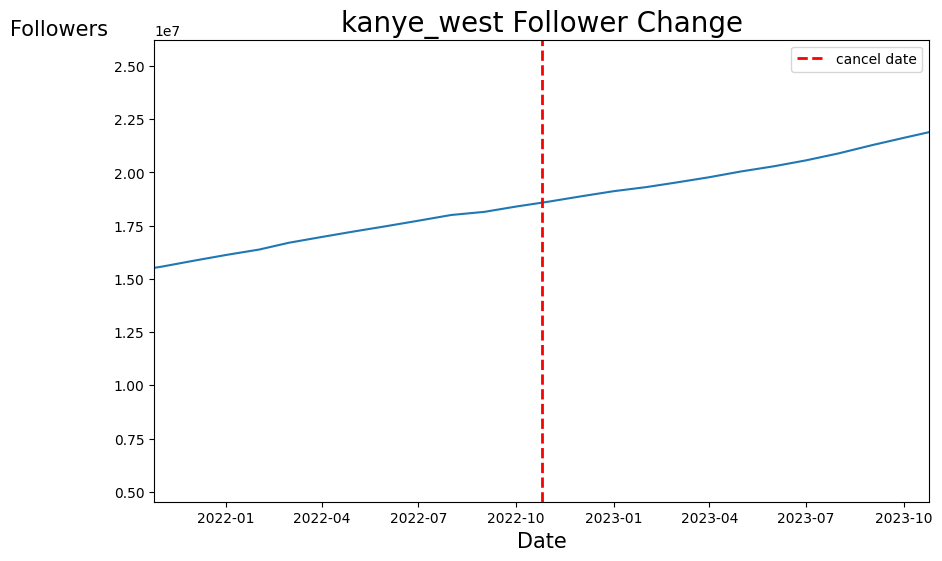

In [13]:
visualize_follower_change(kanye_follower, 'kanye_west')

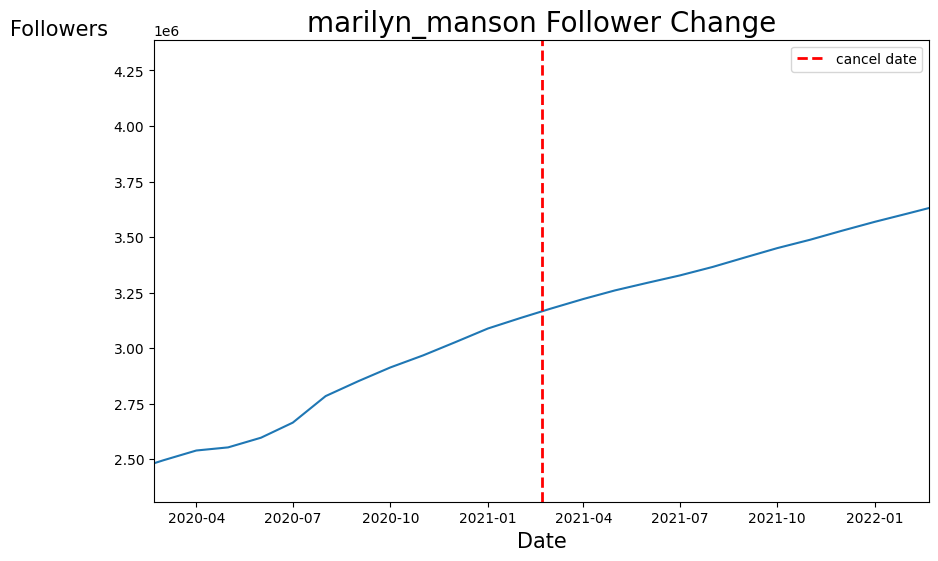

In [14]:
visualize_follower_change(manson_follower, 'marilyn_manson')

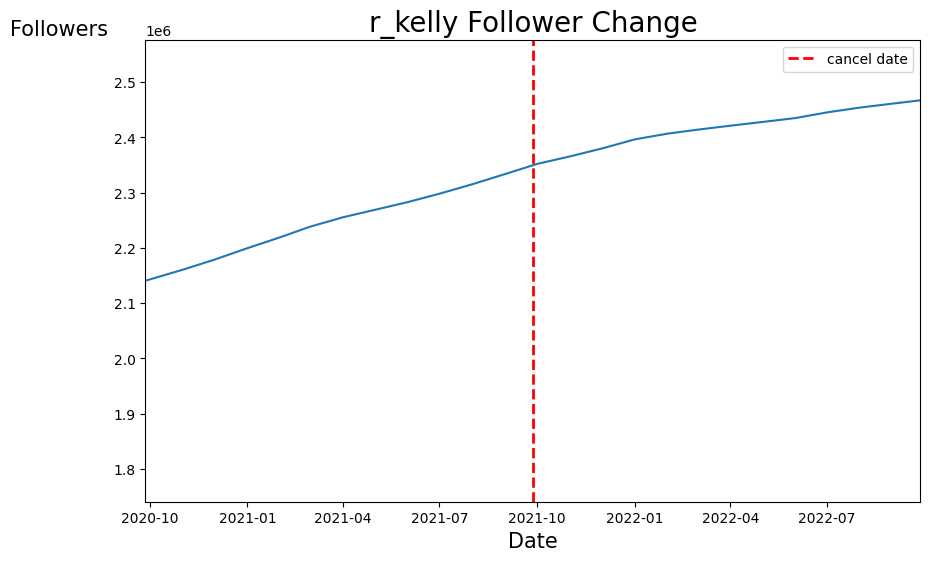

In [15]:
visualize_follower_change(kelly_follower, 'r_kelly')

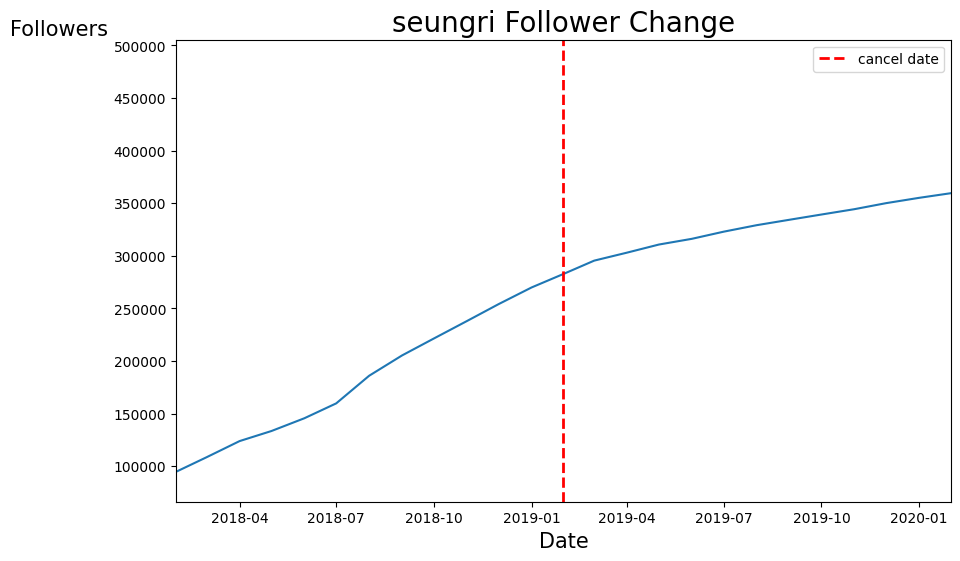

In [16]:
visualize_follower_change(seungri_follower, 'seungri')

## visualize listner change

In [19]:
def visualize_listner_change(df, artist_name):
  cancel_date = CELEBRITIES[CELEBRITIES["name"] == artist_name]["cancellation_date"].iloc[0]
  cancel_date = pd.to_datetime(cancel_date, utc=True).tz_convert(None)

  date_lim_left = cancel_date - pd.DateOffset(years=1)
  date_lim_right = cancel_date + pd.DateOffset(years=1)
  fig, ax = plt.subplots(figsize = (10,6))
  ax.plot(df['Month'], df['value'])
  ax.set_title(f'{artist_name} Listener Change', size = 20)
  ax.set_xlabel('Date', size = 15)
  ax.set_xlim(date_lim_left, min(date_lim_right, df['Month'].max()))
  ax.axvline(cancel_date, color='red', linewidth=2, linestyle = '--', label = 'cancel date')
  ax.set_ylabel('listeners', rotation = 0, loc = 'top', size = 15)
  ax.legend()
  plt.show()

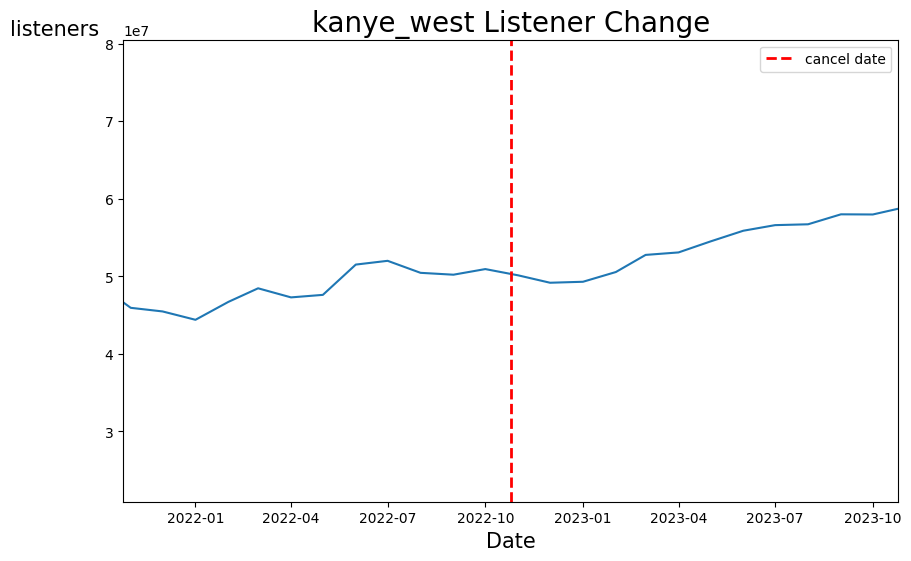

In [20]:
visualize_listner_change(kanye_listner, 'kanye_west')

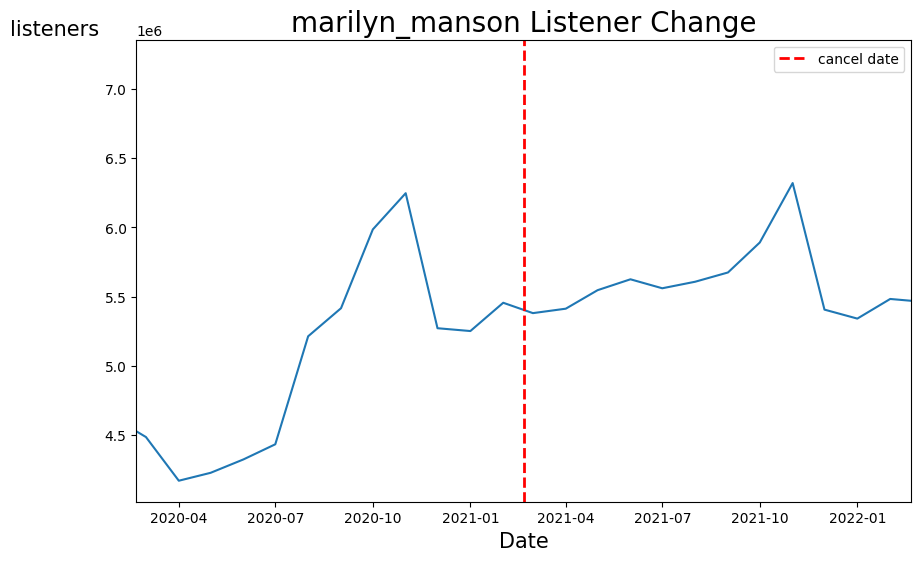

In [21]:
visualize_listner_change(manson_listner, 'marilyn_manson')

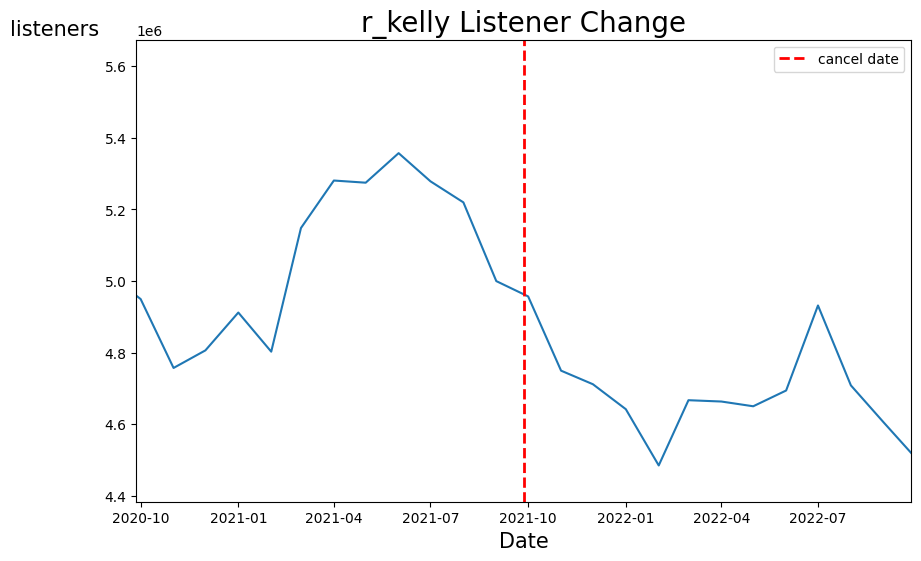

In [22]:
visualize_listner_change(kelly_listner, 'r_kelly')

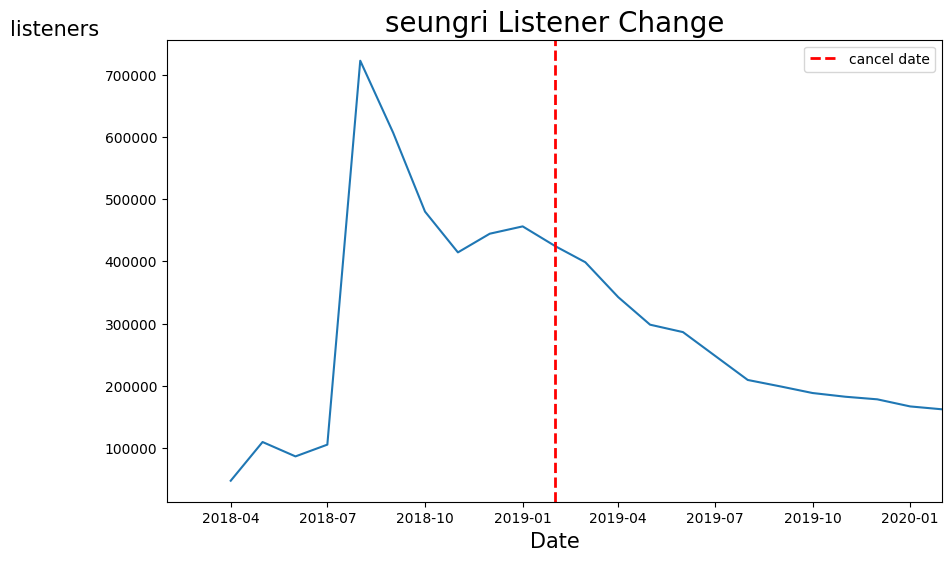

In [23]:
visualize_listner_change(seungri_listner, 'seungri')

## visualize listener / follower ratio

In [24]:
def calculate_ratio(df1, df2):
  df = df1.merge(df2, on = 'Month')
  df.columns = ['Month', 'followers', 'listener']
  df['ratio'] = df['listener'] / df['followers']
  return df

In [25]:
kanye_ratio = calculate_ratio(kanye_follower, kanye_listner)
manson_ratio = calculate_ratio(manson_follower, manson_listner)
kelly_ratio = calculate_ratio(kelly_follower, kelly_listner)
seungri_ratio = calculate_ratio(seungri_follower, seungri_listner)

### visualize and Paired Samples t-test (대응표본 T 검정)
The paired samples t-test, also known as the dependent samples t-test, is a statistical test used to determine whether the mean difference between two paired observations is statistically significant.  
<br>
Null hypothesis : "The mean (or proportion, etc.) before and after cancellation are the same."  


In [26]:
def calculate_threshold(sample_size, alpha):
    df = sample_size - 1
    threshold = t.ppf(1 - alpha/2, df)
    return threshold

In [28]:
def visualize_ratio(df, artist_name):
  cancel_date = CELEBRITIES[CELEBRITIES["name"] == artist_name]["cancellation_date"].iloc[0]
  cancel_date = pd.to_datetime(cancel_date, utc=True).tz_convert(None)

  date_lim_left = cancel_date - pd.DateOffset(months=6)
  date_lim_right = cancel_date + pd.DateOffset(months=6)
  fig, ax = plt.subplots(figsize = (10,6))
  ax.plot(df['Month'], df['ratio'])
  ax.set_title(f'{artist_name} Listener / Follower Ratio', size = 20)
  ax.set_xlabel('Date', size = 15)
  ax.set_xlim(date_lim_left, min(date_lim_right, df['Month'].max()))
  ax.axvline(cancel_date, color='red', linewidth=2, linestyle = '--', label = 'cancel date')
  ax.set_ylabel('ratio', rotation = 0, loc = 'top', size = 15)
  ax.legend()

  before_cancel_mean = df[(df['Month'] < cancel_date) & (df['Month'] > date_lim_left)]['ratio']
  after_cancel_mean = df[(df['Month'] >= cancel_date) & (df['Month'] < date_lim_right)]['ratio']

  if len(before_cancel_mean) > len(after_cancel_mean):
    before_cancel_mean = before_cancel_mean.iloc[:len(after_cancel_mean)]
  elif len(before_cancel_mean) < len(after_cancel_mean):
    after_cancel_mean = after_cancel_mean.iloc[:len(before_cancel_mean)]

  print(f'before cancel mean: {before_cancel_mean.mean()}')
  print(f'after cancel mean: {after_cancel_mean.mean()}')

  #Paired sample t-test
  print('\n\ttry Paired sample t-test')
  t_stat_ratio, p_value_ratio = ttest_rel(before_cancel_mean, after_cancel_mean)
  print(f'\tt-stat: {t_stat_ratio}, p-value: {p_value_ratio}')

  threshold = calculate_threshold(len(before_cancel_mean) * 2, 0.05)
  print(f'\tthreshold: {threshold}')


  if t_stat_ratio > threshold and p_value_ratio < 0.05:
    print('\n### reject null hypothesis ###')
  else:
    print('\n### fail to reject null hypothesis ###')
  plt.show()

before cancel mean: 2.8309796673741308
after cancel mean: 2.6469983681409652

	try Paired sample t-test
	t-stat: 3.3533757345127433, p-value: 0.020253947705337692
	threshold: 2.200985160082949

### reject null hypothesis ###


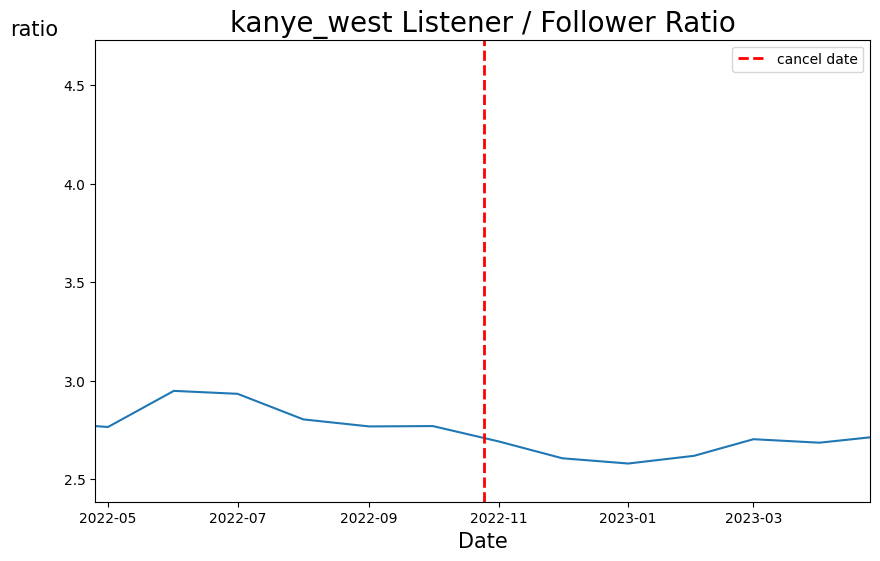

In [29]:
visualize_ratio(kanye_ratio, 'kanye_west')

before cancel mean: 1.8734626313283915
after cancel mean: 1.6866985218757318

	try Paired sample t-test
	t-stat: 2.7051214279991984, p-value: 0.042523121009101654
	threshold: 2.200985160082949

### reject null hypothesis ###


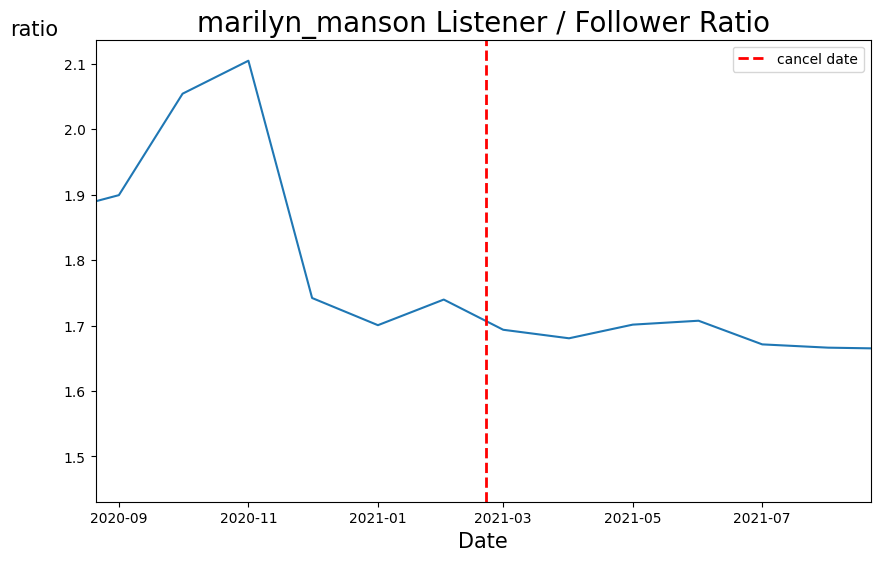

In [30]:
visualize_ratio(manson_ratio, 'marilyn_manson')

before cancel mean: 2.28438673934683
after cancel mean: 1.971315038611844

	try Paired sample t-test
	t-stat: 10.188511109419387, p-value: 0.0001562924332838002
	threshold: 2.200985160082949

### reject null hypothesis ###


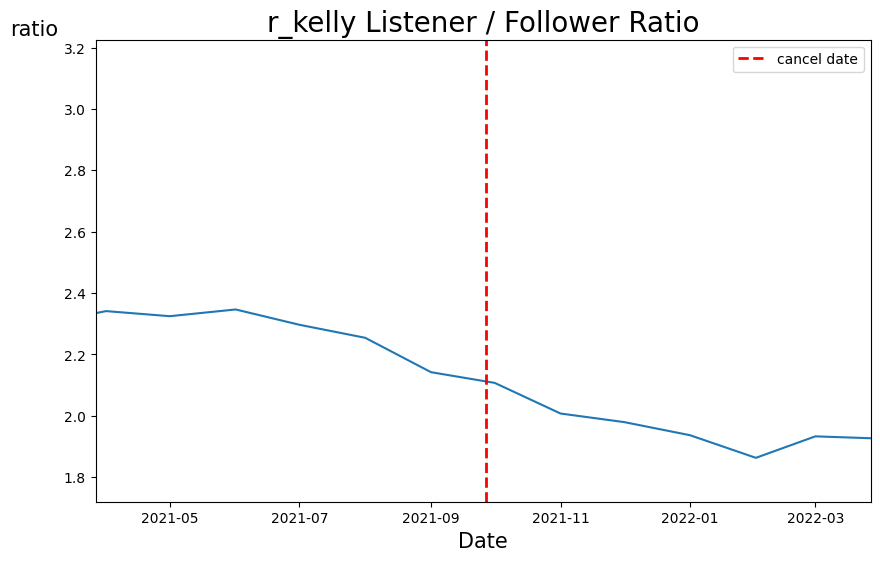

In [31]:
visualize_ratio(kelly_ratio, 'r_kelly')

before cancel mean: 2.36479075012552
after cancel mean: 1.1015316508103892

	try Paired sample t-test
	t-stat: 4.946573379705555, p-value: 0.004297623375502245
	threshold: 2.200985160082949

### reject null hypothesis ###


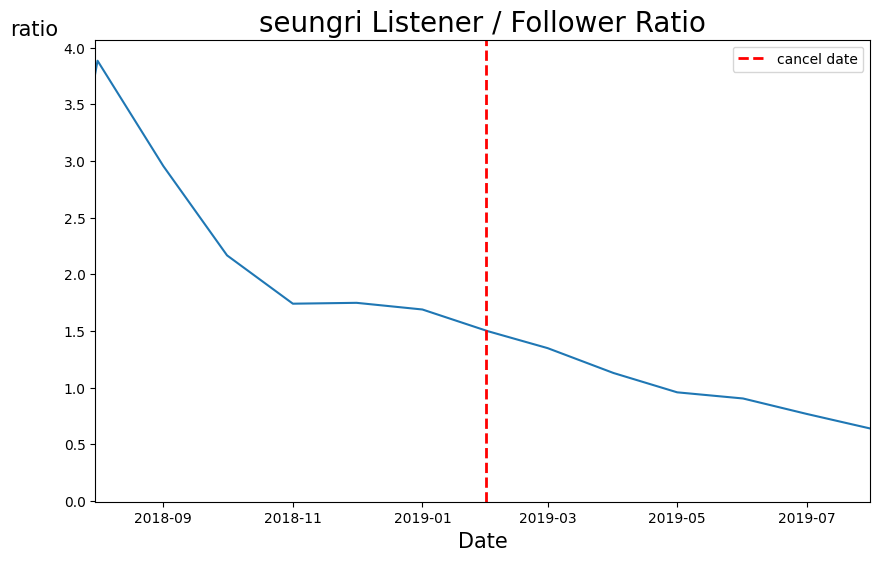

In [32]:
visualize_ratio(seungri_ratio, 'seungri')

## Google Trend Change

In [33]:
def google_trend_change(df):
  df.columns = ['Date', 'Value']
  df['Date'] = pd.to_datetime(df['Date'])
  return df

In [34]:
kanye_gt = google_trend_change(kanye_gt)
manson_gt = google_trend_change(manson_gt)
kelly_gt = google_trend_change(kelly_gt)
seungri_gt = google_trend_change(seungri_gt)

In [35]:
def google_trend_change(df, artist_name):
  cancel_date = CELEBRITIES[CELEBRITIES["name"] == artist_name]["cancellation_date"].iloc[0]
  cancel_date = pd.to_datetime(cancel_date, utc=True).tz_convert(None)

  date_lim_left = cancel_date - pd.DateOffset(years=1)
  date_lim_right = cancel_date + pd.DateOffset(years=1)
  fig, ax = plt.subplots(figsize = (10,6))
  ax.plot(df['Date'], df['Value'])
  ax.set_title(f'{artist_name} Google Trend Change', size = 20)
  ax.set_xlabel('Date', size = 15)
  ax.axvline(cancel_date, color='red', linewidth=2, linestyle = '--', label = 'cancel date')
  ax.set_ylabel('trend', rotation = 0, loc = 'top', size = 15)
  ax.set_xlim(date_lim_left, date_lim_right)
  ax.legend()
  plt.show()

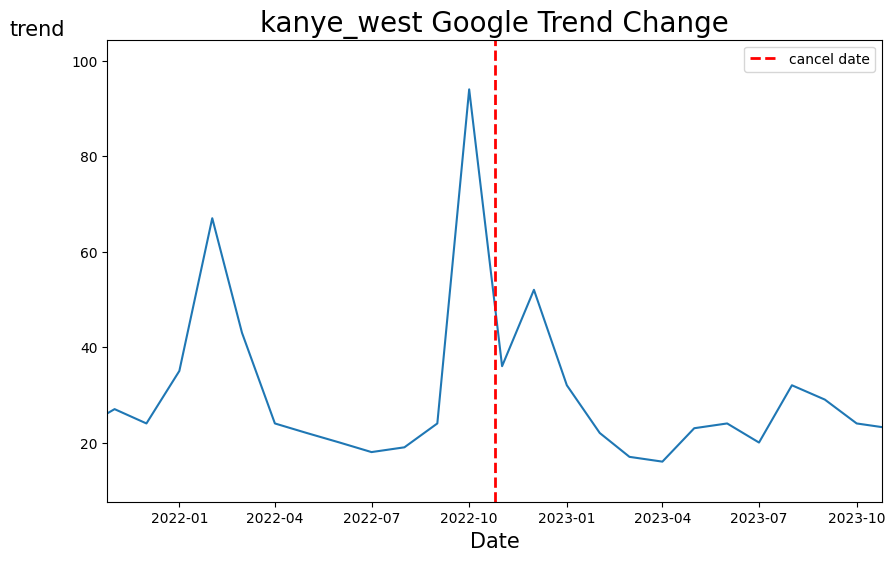

In [36]:
google_trend_change(kanye_gt, 'kanye_west')

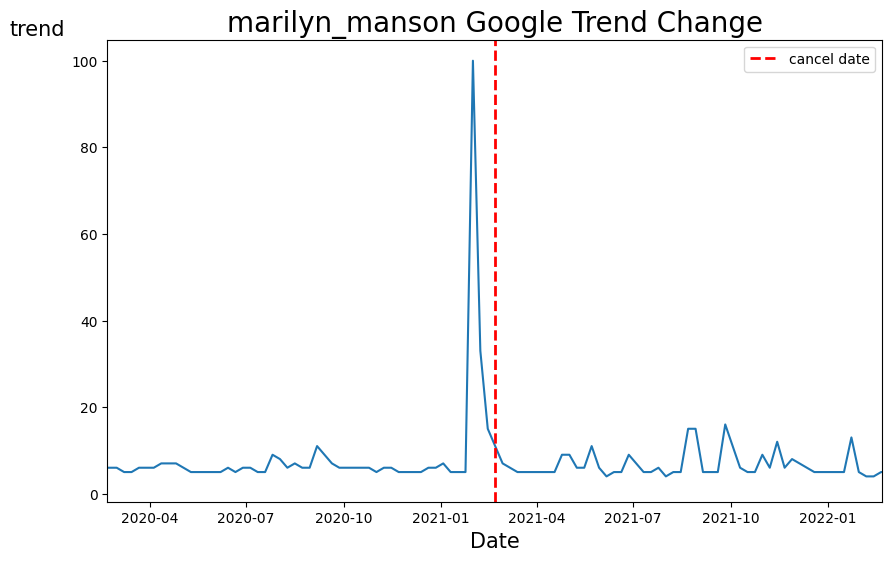

In [37]:
google_trend_change(manson_gt, 'marilyn_manson')

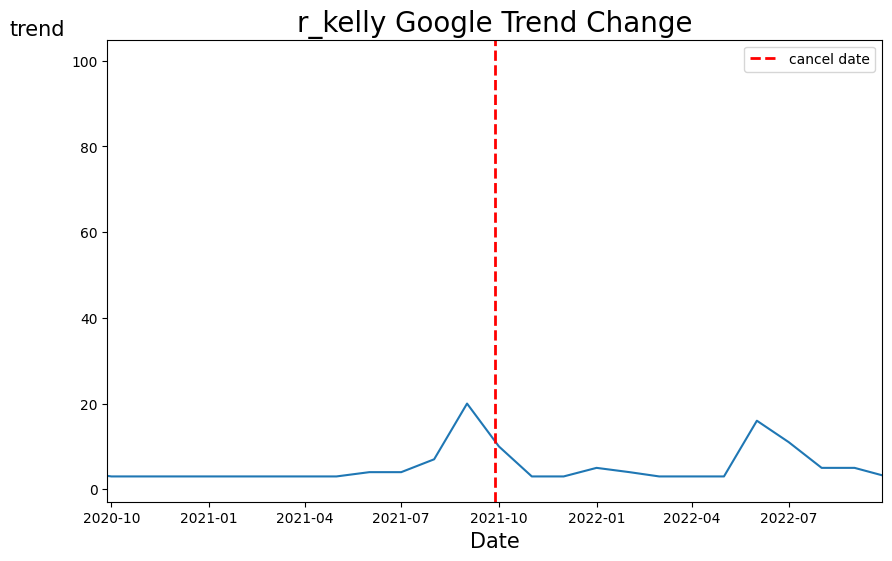

In [38]:
google_trend_change(kelly_gt, 'r_kelly')

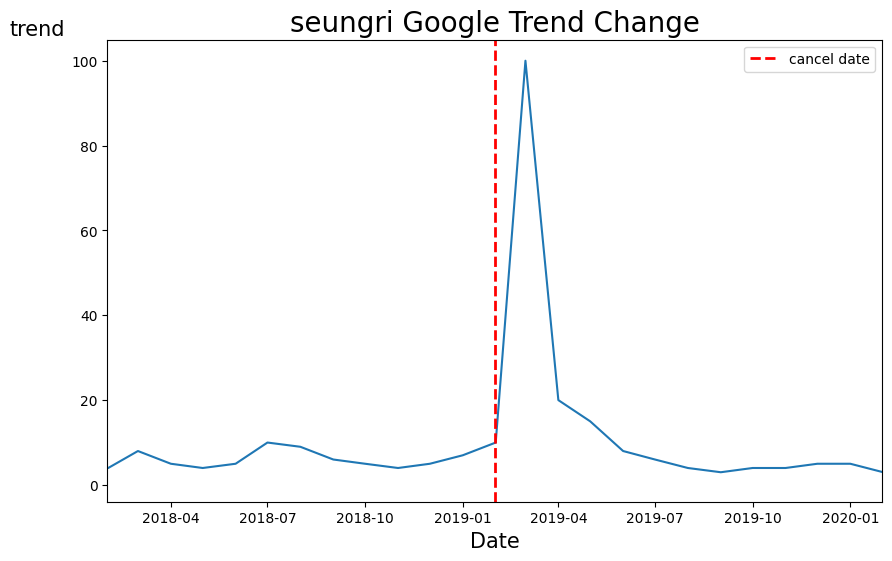

In [39]:
google_trend_change(seungri_gt, 'seungri')

## Billboard chart

In [41]:
billboard_chart = pd.read_csv(os.path.join(RAW_DATA_PATH, 'billboard_charts_2015_to_today.csv'))
billboard_chart['date'] = pd.to_datetime(billboard_chart['date'])

In [42]:
billboard_chart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49100 entries, 0 to 49099
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   date            49100 non-null  datetime64[ns]
 1   song            49100 non-null  object        
 2   artist          49100 non-null  object        
 3   this_week       49100 non-null  int64         
 4   last_week       42440 non-null  float64       
 5   peak_position   49100 non-null  int64         
 6   weeks_on_chart  49100 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(3), object(2)
memory usage: 2.6+ MB


In [56]:
def get_unique_songs_before_after_cancellation(artist_name, billboard_chart):
    # Get the cancellation date of the artist
    artist_cancellation_date = CELEBRITIES.loc[CELEBRITIES['name'] == artist_name, 'cancellation_date'].values[0]
    artist_search_term = CELEBRITIES.loc[CELEBRITIES['name'] == artist_name, 'search_term'].values[0]

    # Filter the DataFrame to get songs by the artist before their cancellation date
    artist_songs_before_cancellation = billboard_chart.loc[
        (billboard_chart['artist'].str.contains(artist_search_term, case=False)) &
        (billboard_chart['date'] < artist_cancellation_date), 
        'song'
    ]

    # Get the count of unique songs
    artist_charting_before = len(artist_songs_before_cancellation.unique())

    # Filter the DataFrame to get songs by the artist after their cancellation date
    artist_songs_after_cancellation = billboard_chart.loc[
        (billboard_chart['artist'].str.contains(artist_search_term, case=False)) &
        (billboard_chart['date'] >= artist_cancellation_date), 
        'song'
    ]

    # Get the count of unique songs
    artist_charting_after = len(artist_songs_after_cancellation.unique())

    return artist_charting_before, artist_charting_after

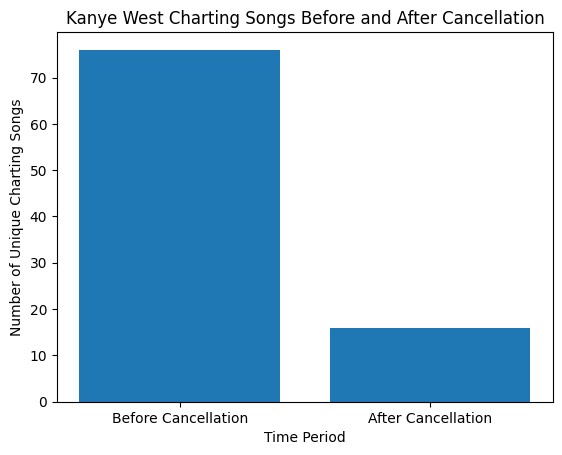

In [57]:
labels = ['Before Cancellation', 'After Cancellation']
values = get_unique_songs_before_after_cancellation('kanye_west', billboard_chart)

plt.bar(labels, values)
plt.xlabel('Time Period')
plt.ylabel('Number of Unique Charting Songs')
plt.title('Kanye West Charting Songs Before and After Cancellation')
plt.show()

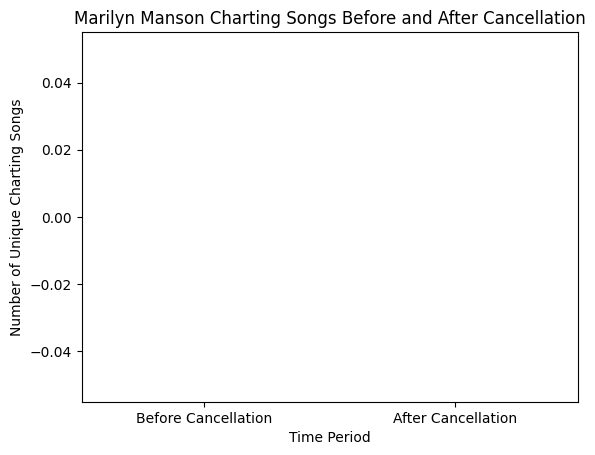

In [58]:
labels = ['Before Cancellation', 'After Cancellation']
values = get_unique_songs_before_after_cancellation('marilyn_manson', billboard_chart)

plt.bar(labels, values)
plt.xlabel('Time Period')
plt.ylabel('Number of Unique Charting Songs')
plt.title('Marilyn Manson Charting Songs Before and After Cancellation')
plt.show()

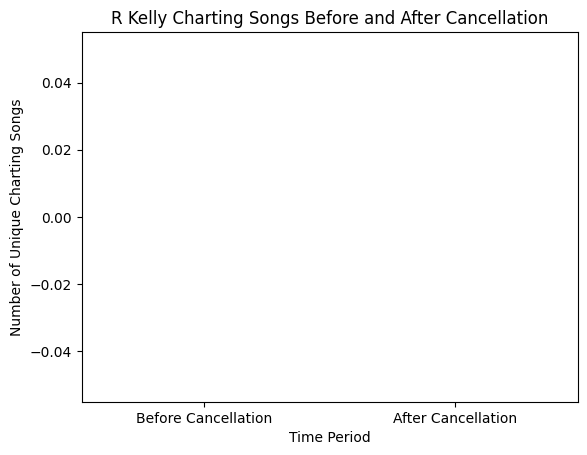

In [59]:
labels = ['Before Cancellation', 'After Cancellation']
values = get_unique_songs_before_after_cancellation('r_kelly', billboard_chart)

plt.bar(labels, values)
plt.xlabel('Time Period')
plt.ylabel('Number of Unique Charting Songs')
plt.title('R Kelly Charting Songs Before and After Cancellation')
plt.show()

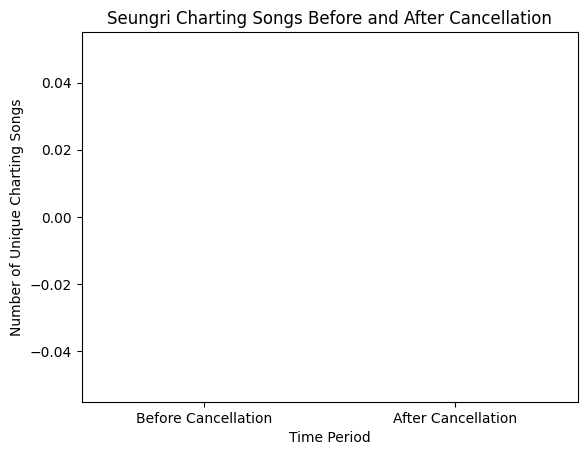

In [60]:
labels = ['Before Cancellation', 'After Cancellation']
values = get_unique_songs_before_after_cancellation('seungri', billboard_chart)

plt.bar(labels, values)
plt.xlabel('Time Period')
plt.ylabel('Number of Unique Charting Songs')
plt.title('Seungri Charting Songs Before and After Cancellation')
plt.show()